# Generating Sample Data from Distributions
Then treating data as if they were samples of real data

* https://github.com/ijmbarr/causalgraphicalmodels
* https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
* https://en.wikipedia.org/wiki/Vehicular_metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 8)
# mpl.rcParams["figure.dpi"] = dpi
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

font_size=15
title_font_size=25

In [4]:
import pandas as pd
print(pd.__version__)

1.4.3


In [5]:
from scipy.stats import skewnorm

In [6]:
import seaborn as sns

In [7]:
# !pip install causalgraphicalmodels

In [8]:
# https://github.com/ijmbarr/causalgraphicalmodels
# https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
from causalgraphicalmodels import StructuralCausalModel

In [9]:
# https://en.wikipedia.org/wiki/Vehicular_metrics

braking_distance_mean = 40
braking_distance_std = 5
power_mean = 100
power_std = 50

car_safety_model = StructuralCausalModel({
    "emergency_breaking": lambda n_samples: np.random.binomial(1, p=0.60, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_breaking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_breaking - \
                             # having a breaking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1)
})

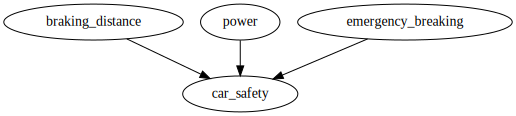

In [10]:
car_safety_model.cgm.draw()

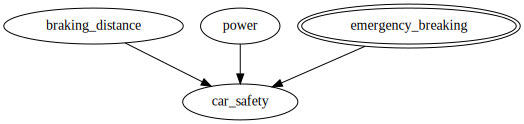

In [11]:
car_safety_model_do_emergency_breaking = car_safety_model.do("emergency_breaking")

car_safety_model_do_emergency_breaking.cgm.draw()

In [12]:
car_safety_model.cgm.get_distribution()

'P(emergency_breaking)P(braking_distance)P(power)P(car_safety|emergency_breaking,braking_distance,power)'

In [13]:
n_samples=10_000
# data = car_safety_model_do_emergency_breaking.sample(n_samples=n_samples, 
#                                                      set_values={"emergency_breaking": np.ones(n_samples)})
data = car_safety_model.sample(n_samples=n_samples)
data.head()

,emergency_breaking,braking_distance,power,car_safety
0,1,44.642188,122.865176,-0.189242
1,1,36.398297,127.445292,1.218448
2,0,41.237955,106.167312,-0.361591
3,0,44.678406,160.368679,-2.192920
4,1,37.908466,122.553468,0.942140


In [14]:
braking_distance = 31.983544

In [15]:
(braking_distance - braking_distance_mean) / braking_distance_std

-1.6032912000000004

In [16]:
power = 50

In [17]:
abs(power - power_mean) / power_std

1.0

In [18]:
data.describe()

,emergency_breaking,braking_distance,power,car_safety
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.596300,39.948680,135.359468,-0.185370
std,0.490663,5.046608,35.264507,1.276356
min,0.000000,22.084626,33.573422,-6.028485
25%,0.000000,36.537052,110.560310,-1.025860
50%,1.000000,39.951621,132.426662,-0.171113
75%,1.000000,43.326189,157.281936,0.692927
max,1.000000,57.969320,294.037953,4.448676


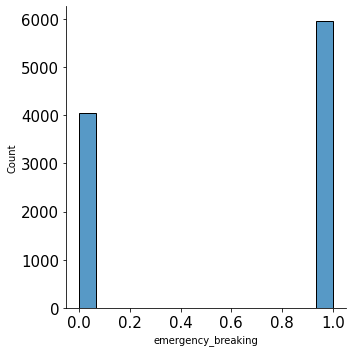

In [19]:
sns.displot(data["emergency_breaking"]);

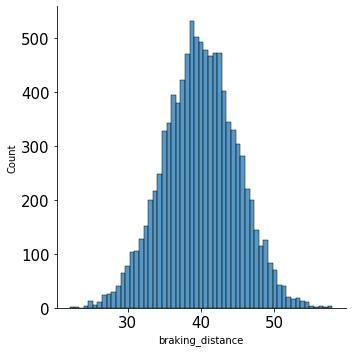

In [20]:
sns.displot(data["braking_distance"]);

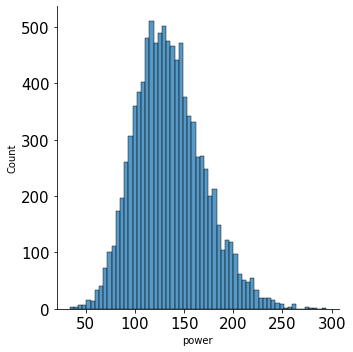

In [21]:
sns.displot(data["power"]);

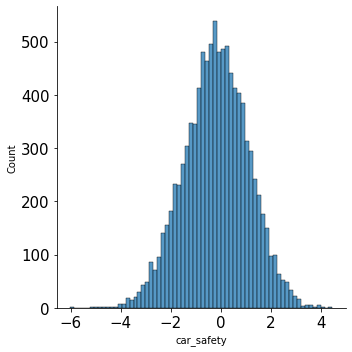

In [22]:
sns.displot(data["car_safety"]);

In [23]:
# sns.kdeplot?

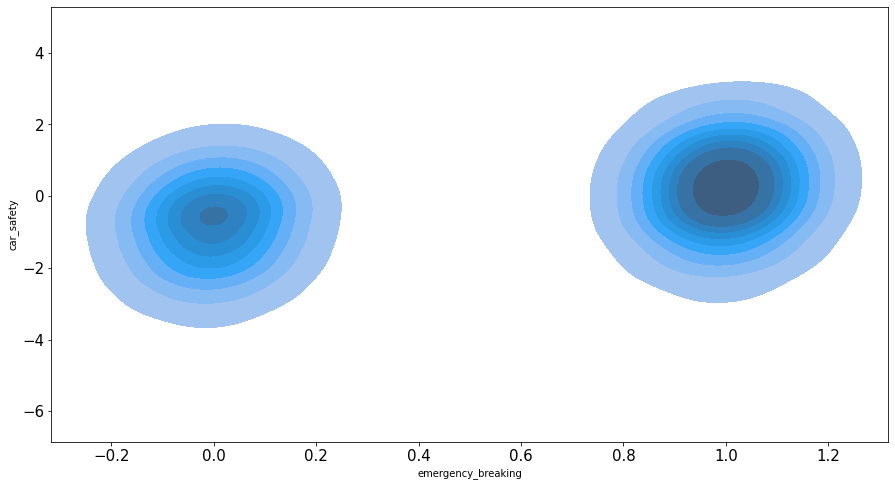

In [24]:
sns.kdeplot(
    data=data["emergency_breaking"],
    data2=data["car_safety"],
    fill=True
);

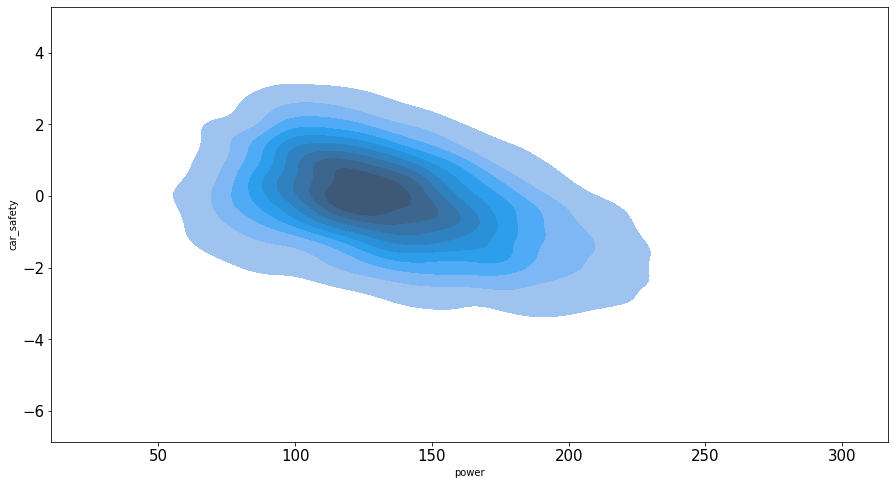

In [25]:
sns.kdeplot(
    data=data["power"],
    data2=data["car_safety"],
    fill=True
);

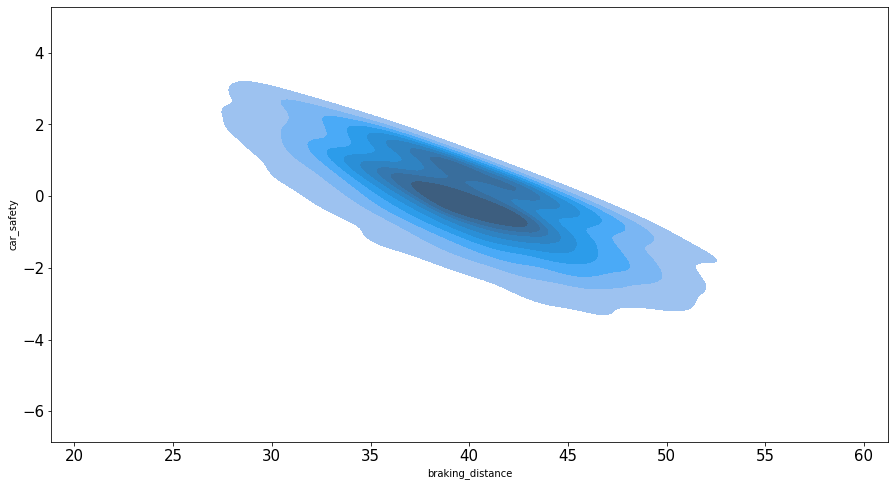

In [26]:
sns.kdeplot(
    data=data["braking_distance"],
    data2=data["car_safety"],
    fill=True
);

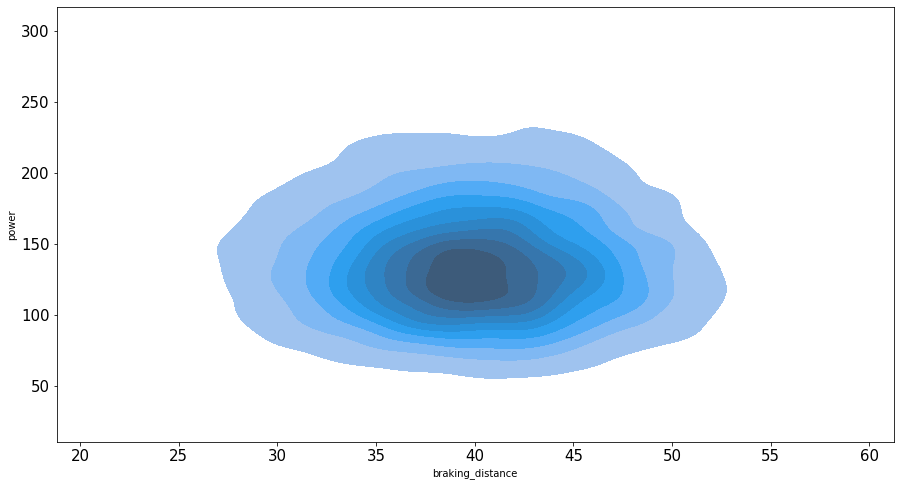

In [27]:
sns.kdeplot(
    data=data["braking_distance"],
    data2=data["power"],
    fill=True
);

In [28]:
from scipy.stats import pearsonr


In [29]:
# pearsonr?

In [30]:
r, p_value = pearsonr(data['braking_distance'], data['power'])
# The p-value roughly indicates the probability of an uncorrelated system
# producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.
r, p_value

(-0.004788565618865639, 0.6320813107218377)

In [31]:
r, p_value = pearsonr(data['braking_distance'], data['car_safety'])
r, p_value

(-0.7877194604006568, 0.0)

In [32]:
r, p_value = pearsonr(data['power'], data['car_safety'])
r, p_value

(-0.4354198776188608, 0.0)

# Driver's ability

age distribution: https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/Tabellen/bevoelkerung-altersgruppen-deutschland.html

(16, 100, 34.9514, 13.372226368110883, 10000)

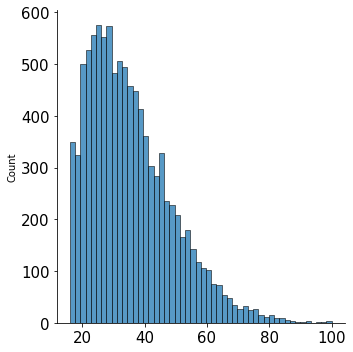

In [33]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [34]:
driver_ability_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    "age": lambda n_samples: skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1)})

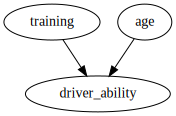

In [35]:
driver_ability_model.cgm.draw()

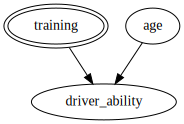

In [36]:
driver_ability_model_with_training = driver_ability_model.do("training")

driver_ability_model_with_training.cgm.draw()

In [37]:
driver_ability_model.cgm.get_distribution()

'P(training)P(age)P(driver_ability|training,age)'

In [38]:
n_samples=10_000
data = driver_ability_model.sample(n_samples=n_samples)
data.head()

,training,age,driver_ability
0,0,41.760405,-0.387062
1,0,29.126453,-0.302831
2,0,18.759600,-0.817298
3,0,75.827291,-1.843940
4,1,20.420337,0.319753


In [39]:
age = 80

In [40]:
# abs(age - age_skewed_mean) / age_skewed_std
# more balanced
abs(age - age_skewed_mean) / age_std

2.0476636363636365

In [41]:
data.describe()

,training,age,driver_ability
count,10000.000000,10000.000000,10000.000000
mean,0.199400,35.499929,-0.276274
std,0.399569,13.192871,0.548964
min,0.000000,14.865604,-3.106279
25%,0.000000,25.193821,-0.596888
50%,0.000000,32.829443,-0.326699
75%,0.000000,43.181522,-0.046062
max,1.000000,104.575415,1.239649


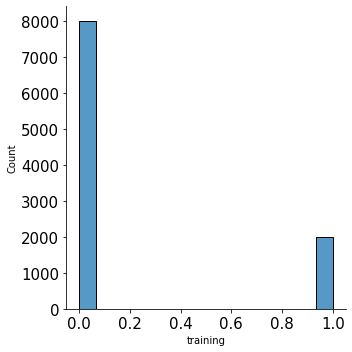

In [42]:
sns.displot(data["training"]);

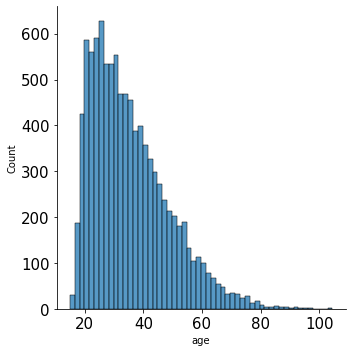

In [43]:
sns.displot(data["age"]);

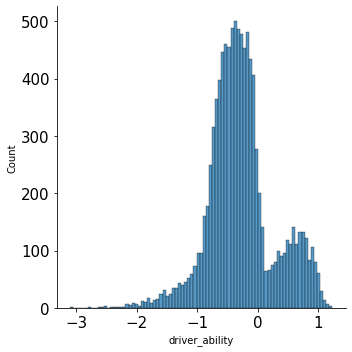

In [44]:
sns.displot(data["driver_ability"]);

In [45]:
# sns.kdeplot?

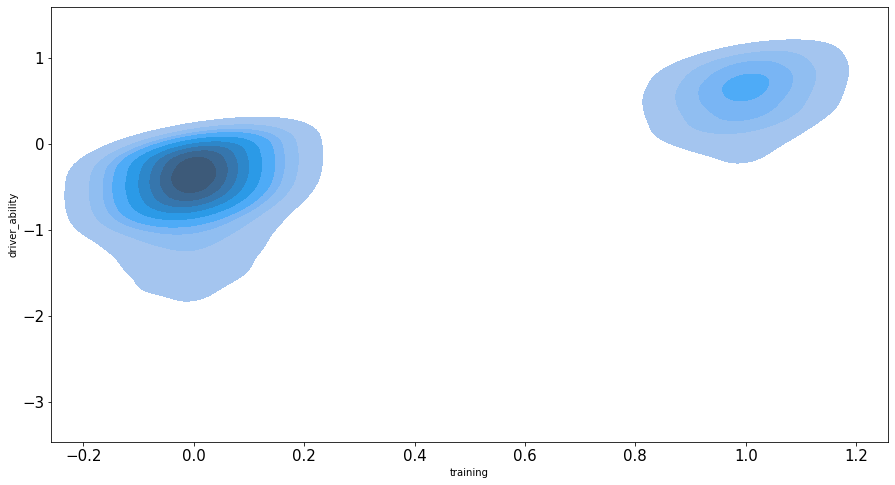

In [46]:
sns.kdeplot(
    data=data["training"],
    data2=data["driver_ability"],
    fill=True
);

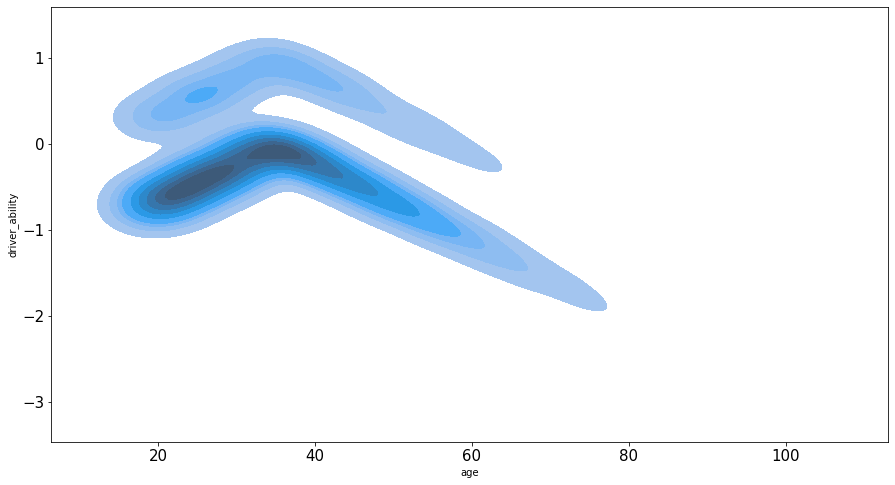

In [47]:
sns.kdeplot(
    data=data["age"],
    data2=data["driver_ability"],
    fill=True
);

In [48]:
r, p_value = pearsonr(data['age'], data['driver_ability'])
r, p_value

(-0.33315971382380655, 8.915017554081764e-258)

In [49]:
r, p_value = pearsonr(data['training'], data['driver_ability'])
r, p_value

(0.7251001152147941, 0.0)

In [50]:
r, p_value = pearsonr(data['training'], data['age'])
r, p_value

(0.004425987890760957, 0.6580944198207658)

# Combined risk model

In [51]:
from sklearn.preprocessing import normalize

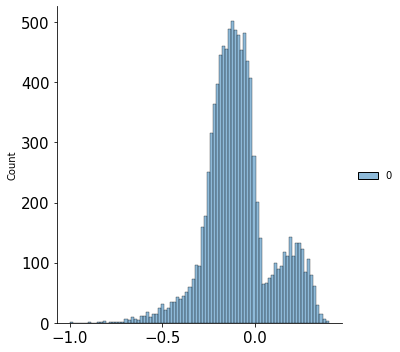

In [52]:
ability = normalize(data['driver_ability'].values.reshape(-1, 1), axis=0, norm='max')
sns.displot(ability);

(6.224664384261061, 126.67971051738512, 44.15169219551637, 15.76632376738184)

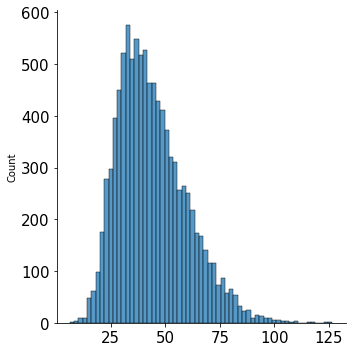

In [53]:
miles_mean = 25
miles_std = 25

x = skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples)
sns.displot(x);
miles_skewed_mean = x.mean()
miles_skewed_std = x.std()

x.min(), x.max(), miles_skewed_mean, miles_skewed_std

In [54]:
risk_model = StructuralCausalModel({
    "ability": lambda n_samples: driver_ability_model.sample(n_samples=n_samples)['driver_ability'], 
    "safety": lambda n_samples: car_safety_model.sample(n_samples=n_samples)['car_safety'],
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda ability, safety, miles, n_samples:
                # negative score is high risk
             - np.random.normal(loc=ability + \
                             safety -
                             # all deviation from good miles is negative
                             abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

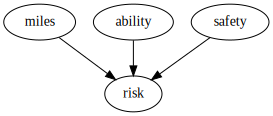

In [55]:
risk_model.cgm.draw()

In [56]:
n_samples=10_000
data = risk_model.sample(n_samples=n_samples)
data.head()

,ability,safety,miles,risk
0,-0.572374,0.408103,73.471412,2.161018
1,-0.153162,-2.728192,31.452073,3.108073
2,-0.158379,-0.480274,26.636111,0.788602
3,-0.026770,-2.056975,27.755366,2.231908
4,-0.325496,1.256821,28.620698,-0.844794


In [57]:
data.describe()

,ability,safety,miles,risk
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.289327,-0.196384,44.242785,1.276816
std,0.551361,1.271178,15.754878,1.510042
min,-2.897761,-5.062065,6.694929,-4.189968
25%,-0.610233,-1.025224,32.452612,0.239835
50%,-0.336663,-0.174197,41.623771,1.236415
75%,-0.058302,0.680627,53.599425,2.264322
max,1.254529,4.793812,125.440116,7.547765


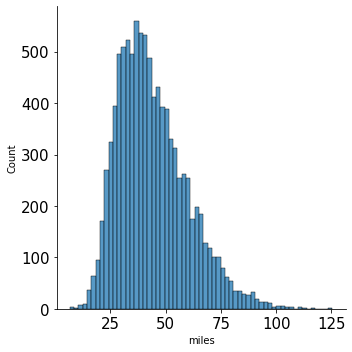

In [58]:
sns.displot(data["miles"]);

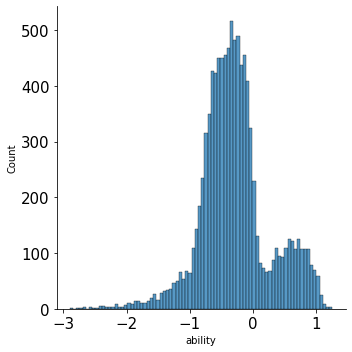

In [59]:
sns.displot(data["ability"]);

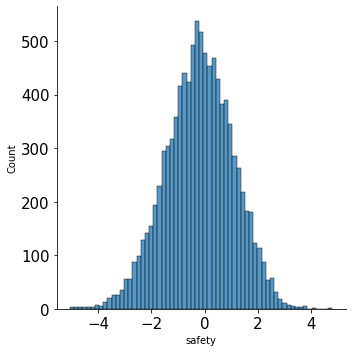

In [60]:
sns.displot(data["safety"]);

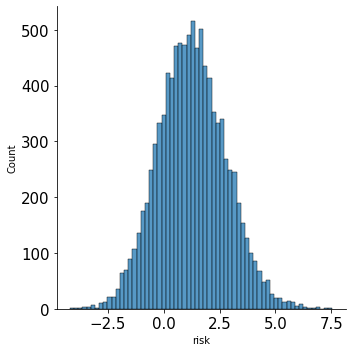

In [61]:
sns.displot(data["risk"]);

In [62]:
# sns.kdeplot?

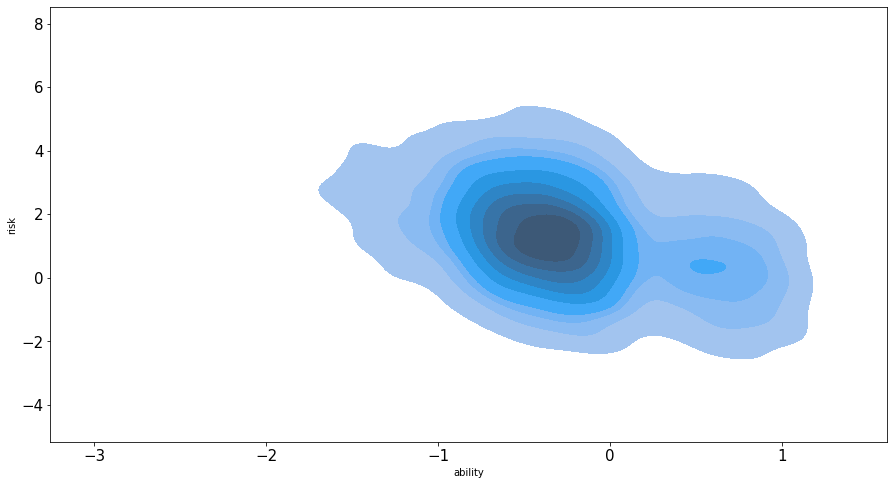

In [63]:
sns.kdeplot(
    data=data["ability"],
    data2=data["risk"],
    fill=True
);

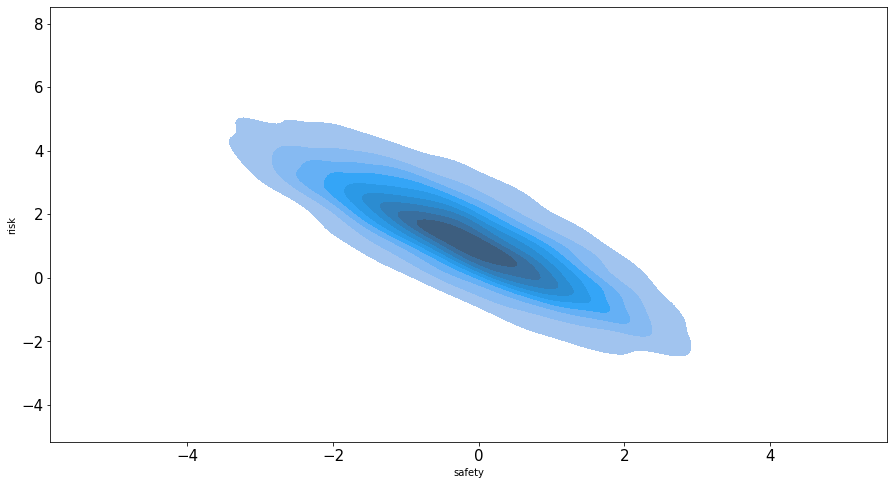

In [64]:
sns.kdeplot(
    data=data["safety"],
    data2=data["risk"],
    fill=True
);

In [65]:
r, p_value = pearsonr(data['safety'], data['risk'])
r, p_value

(-0.8395097905598364, 0.0)

In [66]:
r, p_value = pearsonr(data['ability'], data['risk'])
r, p_value

(-0.3734705995467459, 0.0)

In [67]:
r, p_value = pearsonr(data['ability'], data['safety'])
r, p_value

(0.012355357519135772, 0.2166710892000088)

# Decomposed combined

(16, 100, 34.9975, 13.360168178207939, 10000)

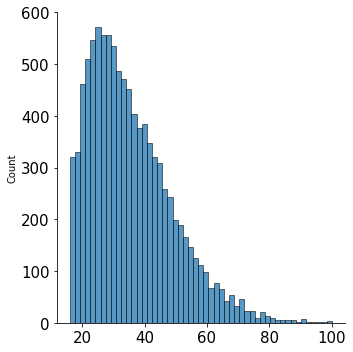

In [68]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [69]:
# can be changed over time in favor of the car
# driver is overall more important than car
driver_weight = 4

risk_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
#     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
    "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1),
    "emergency_breaking": lambda n_samples: np.random.binomial(1, p=0.40, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_breaking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_breaking - \
                             # having a breaking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1),
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda driver_ability, car_safety, miles, n_samples:
             # negative score is high risk
             - np.random.normal(loc=\
                             driver_ability * driver_weight\
                             + car_safety
                             # all deviation from good miles is negative
                             - abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

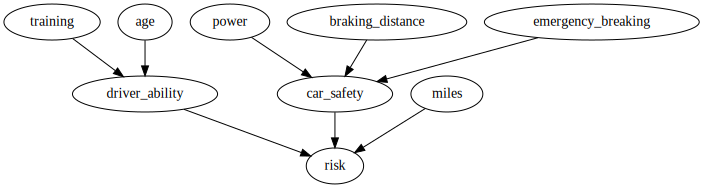

In [70]:
risk_model.cgm.draw()

In [71]:
# n_samples=10_000
n_samples=1_500
np.random.seed(42)
data = risk_model.sample(n_samples=n_samples)
data.head()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
0,0,74.493138,1,38.264068,122.527184,28.744236,-1.755792,0.803182,6.295961
1,1,67.074261,0,43.854011,115.367900,51.519687,-0.422205,-0.958545,3.772632
2,0,47.691471,0,34.730823,126.498658,52.320498,-0.661309,0.670282,3.062665
3,0,55.429717,0,42.139072,125.629252,54.241036,-1.045458,-0.821925,6.258721
4,0,41.088408,1,31.490489,241.447458,41.182762,-0.248701,-0.077803,1.786761


In [72]:
data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,43.766704,-0.264698,-0.396552,2.225049
std,0.405532,13.193059,0.486679,5.108156,36.527189,15.274232,0.545011,1.273974,2.576267
min,0.000000,16.000000,0.000000,25.502431,31.956980,8.911590,-2.370182,-4.755363,-6.220299
25%,0.000000,24.971581,0.000000,36.261921,112.369662,32.597446,-0.591373,-1.242621,0.572977
50%,0.000000,32.511926,0.000000,39.697162,134.053456,41.697948,-0.310444,-0.377730,2.331219
75%,0.000000,43.043168,1.000000,43.284010,160.117914,52.330167,-0.020692,0.495051,3.804784
max,1.000000,88.456666,1.000000,55.491497,281.197004,106.746630,1.165727,3.637374,13.344780


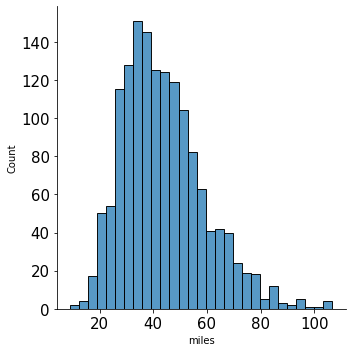

In [73]:
sns.displot(data["miles"]);

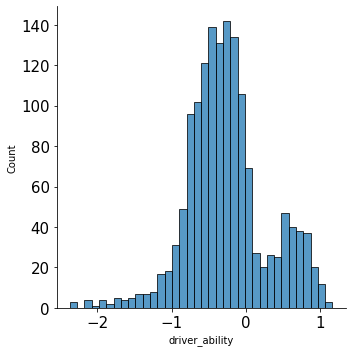

In [74]:
sns.displot(data["driver_ability"]);

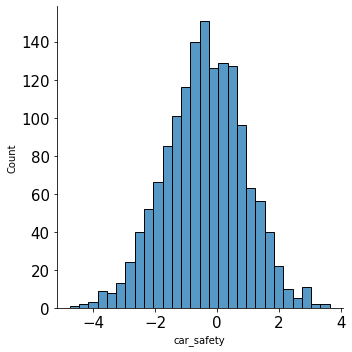

In [75]:
sns.displot(data["car_safety"]);

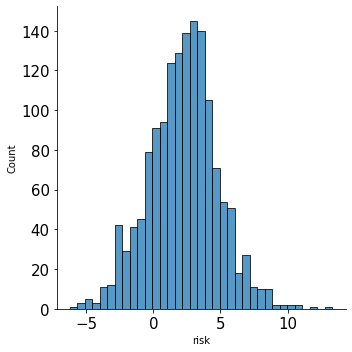

In [76]:
sns.displot(data["risk"]);

In [77]:
# sns.kdeplot?

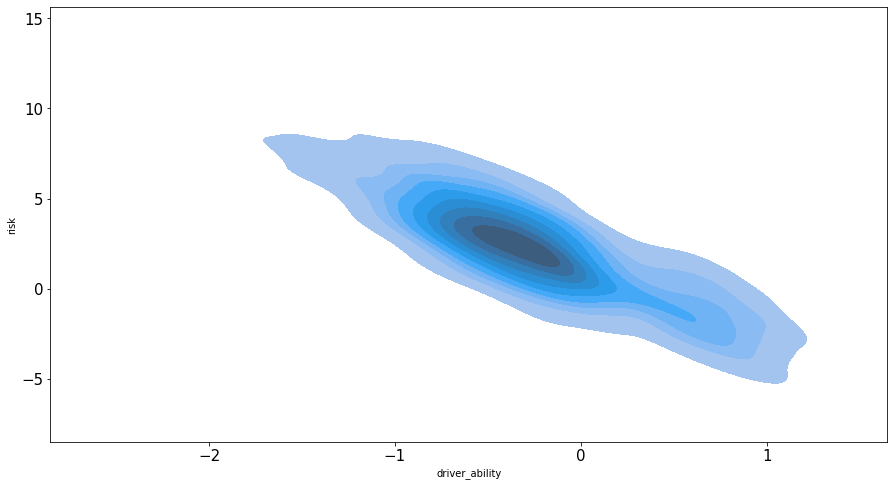

In [78]:
sns.kdeplot(
    data=data["driver_ability"],
    data2=data["risk"],
    fill=True
);

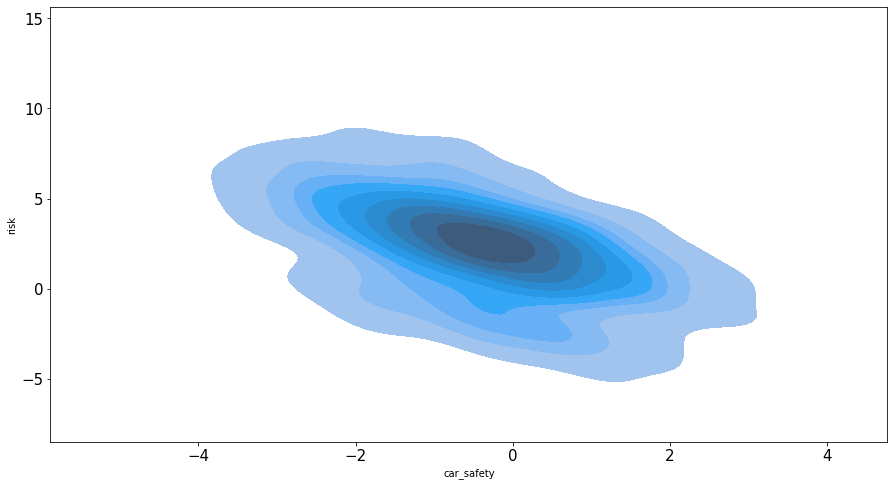

In [79]:
sns.kdeplot(
    data=data["car_safety"],
    data2=data["risk"],
    fill=True
);

In [80]:
r, p_value = pearsonr(data['car_safety'], data['risk'])
r, p_value

(-0.49494592800029147, 1.633893984624419e-93)

In [81]:
r, p_value = pearsonr(data['driver_ability'], data['risk'])
r, p_value

(-0.8363052569531675, 0.0)

In [82]:
r, p_value = pearsonr(data['driver_ability'], data['car_safety'])
r, p_value

(-0.0029502662091996272, 0.9091043714334741)

In [83]:
data.head()

,training,age,emergency_breaking,braking_distance,power,miles,driver_ability,car_safety,risk
0,0,74.493138,1,38.264068,122.527184,28.744236,-1.755792,0.803182,6.295961
1,1,67.074261,0,43.854011,115.367900,51.519687,-0.422205,-0.958545,3.772632
2,0,47.691471,0,34.730823,126.498658,52.320498,-0.661309,0.670282,3.062665
3,0,55.429717,0,42.139072,125.629252,54.241036,-1.045458,-0.821925,6.258721
4,0,41.088408,1,31.490489,241.447458,41.182762,-0.248701,-0.077803,1.786761


In [84]:
GREEN = 2
YELLOW = 1
RED = 0

In [85]:
features = ['training', 'age', 'emergency_breaking', 'braking_distance', 'power', 'miles', 'risk']

In [86]:
# preprocessed_data = data[['driver_ability', 'car_safety', 'miles', 'risk']]
preprocessed_data = data[features]
# preprocessed_data = data.copy()
preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
preprocessed_data['group_name'] = 'medium'
preprocessed_data['group'] = YELLOW
preprocessed_data.head()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,74.493138,1,38.264068,122.527184,28.744236,0.471792,medium,1
1,1,67.074261,0,43.854011,115.367900,51.519687,0.282705,medium,1
2,0,47.691471,0,34.730823,126.498658,52.320498,0.229503,medium,1
3,0,55.429717,0,42.139072,125.629252,54.241036,0.469001,medium,1
4,0,41.088408,1,31.490489,241.447458,41.182762,0.133892,medium,1


In [87]:
preprocessed_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0
mean,0.207333,35.243806,0.384667,39.728535,137.524885,43.766704,0.166736,1.0
std,0.405532,13.193059,0.486679,5.108156,36.527189,15.274232,0.193054,0.0
min,0.000000,16.000000,0.000000,25.502431,31.956980,8.911590,-0.466122,1.0
25%,0.000000,24.971581,0.000000,36.261921,112.369662,32.597446,0.042936,1.0
50%,0.000000,32.511926,0.000000,39.697162,134.053456,41.697948,0.174691,1.0
75%,0.000000,43.043168,1.000000,43.284010,160.117914,52.330167,0.285114,1.0
max,1.000000,88.456666,1.000000,55.491497,281.197004,106.746630,1.000000,1.0


In [88]:
# balanced? imbalanced?
low_risk_threshold = preprocessed_data['risk'].quantile(.45)
# low_risk_threshold = preprocessed_data['risk'].quantile(.4)
# low_risk_threshold = preprocessed_data['risk'].quantile(.35)
# low_risk_threshold = preprocessed_data['risk'].quantile(.3333)
# low_risk_threshold = preprocessed_data['risk'].quantile(.50)
low_risk_threshold

0.14984986605815043

In [89]:
# high_risk_threshold = preprocessed_data['risk'].quantile(.6)
# high_risk_threshold = preprocessed_data['risk'].quantile(.65)
# high_risk_threshold = preprocessed_data['risk'].quantile(.6666)
high_risk_threshold = preprocessed_data['risk'].quantile(.55)
# high_risk_threshold = preprocessed_data['risk'].quantile(.75)
high_risk_threshold

0.1975142710326823

In [90]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])

In [91]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

In [92]:
np.unique(preprocessed_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([675, 675, 150]))

In [93]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])

In [94]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])

In [95]:
preprocessed_data.head(10)

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,74.493138,1,38.264068,122.527184,28.744236,0.471792,high,0
1,1,67.074261,0,43.854011,115.367900,51.519687,0.282705,high,0
2,0,47.691471,0,34.730823,126.498658,52.320498,0.229503,high,0
3,0,55.429717,0,42.139072,125.629252,54.241036,0.469001,high,0
4,0,41.088408,1,31.490489,241.447458,41.182762,0.133892,low,2
5,0,69.693872,0,37.193310,167.797457,55.167091,0.592410,high,0
6,0,49.558664,0,38.352553,164.678203,34.774203,0.236750,high,0
7,1,28.690422,0,48.374298,126.981076,33.556179,-0.027928,low,2
8,0,31.817048,0,38.625988,95.699767,29.853749,-0.000853,low,2
9,0,37.597146,1,28.993783,128.365608,39.237379,-0.082281,low,2


In [96]:
preprocessed_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,43.766704,0.166736,1.000
std,0.405532,13.193059,0.486679,5.108156,36.527189,15.274232,0.193054,0.949
min,0.000000,16.000000,0.000000,25.502431,31.956980,8.911590,-0.466122,0.000
25%,0.000000,24.971581,0.000000,36.261921,112.369662,32.597446,0.042936,0.000
50%,0.000000,32.511926,0.000000,39.697162,134.053456,41.697948,0.174691,1.000
75%,0.000000,43.043168,1.000000,43.284010,160.117914,52.330167,0.285114,2.000
max,1.000000,88.456666,1.000000,55.491497,281.197004,106.746630,1.000000,2.000


In [97]:
labels = ["High Risk", "Medium Risk", "Low Risk"]
markers = ['v', 'd', '^']
# colors = ['#FF8080', '#FFFF80', '#8080FF']
colors = ['#FF0000', '#FFFF00', '#0000FF']

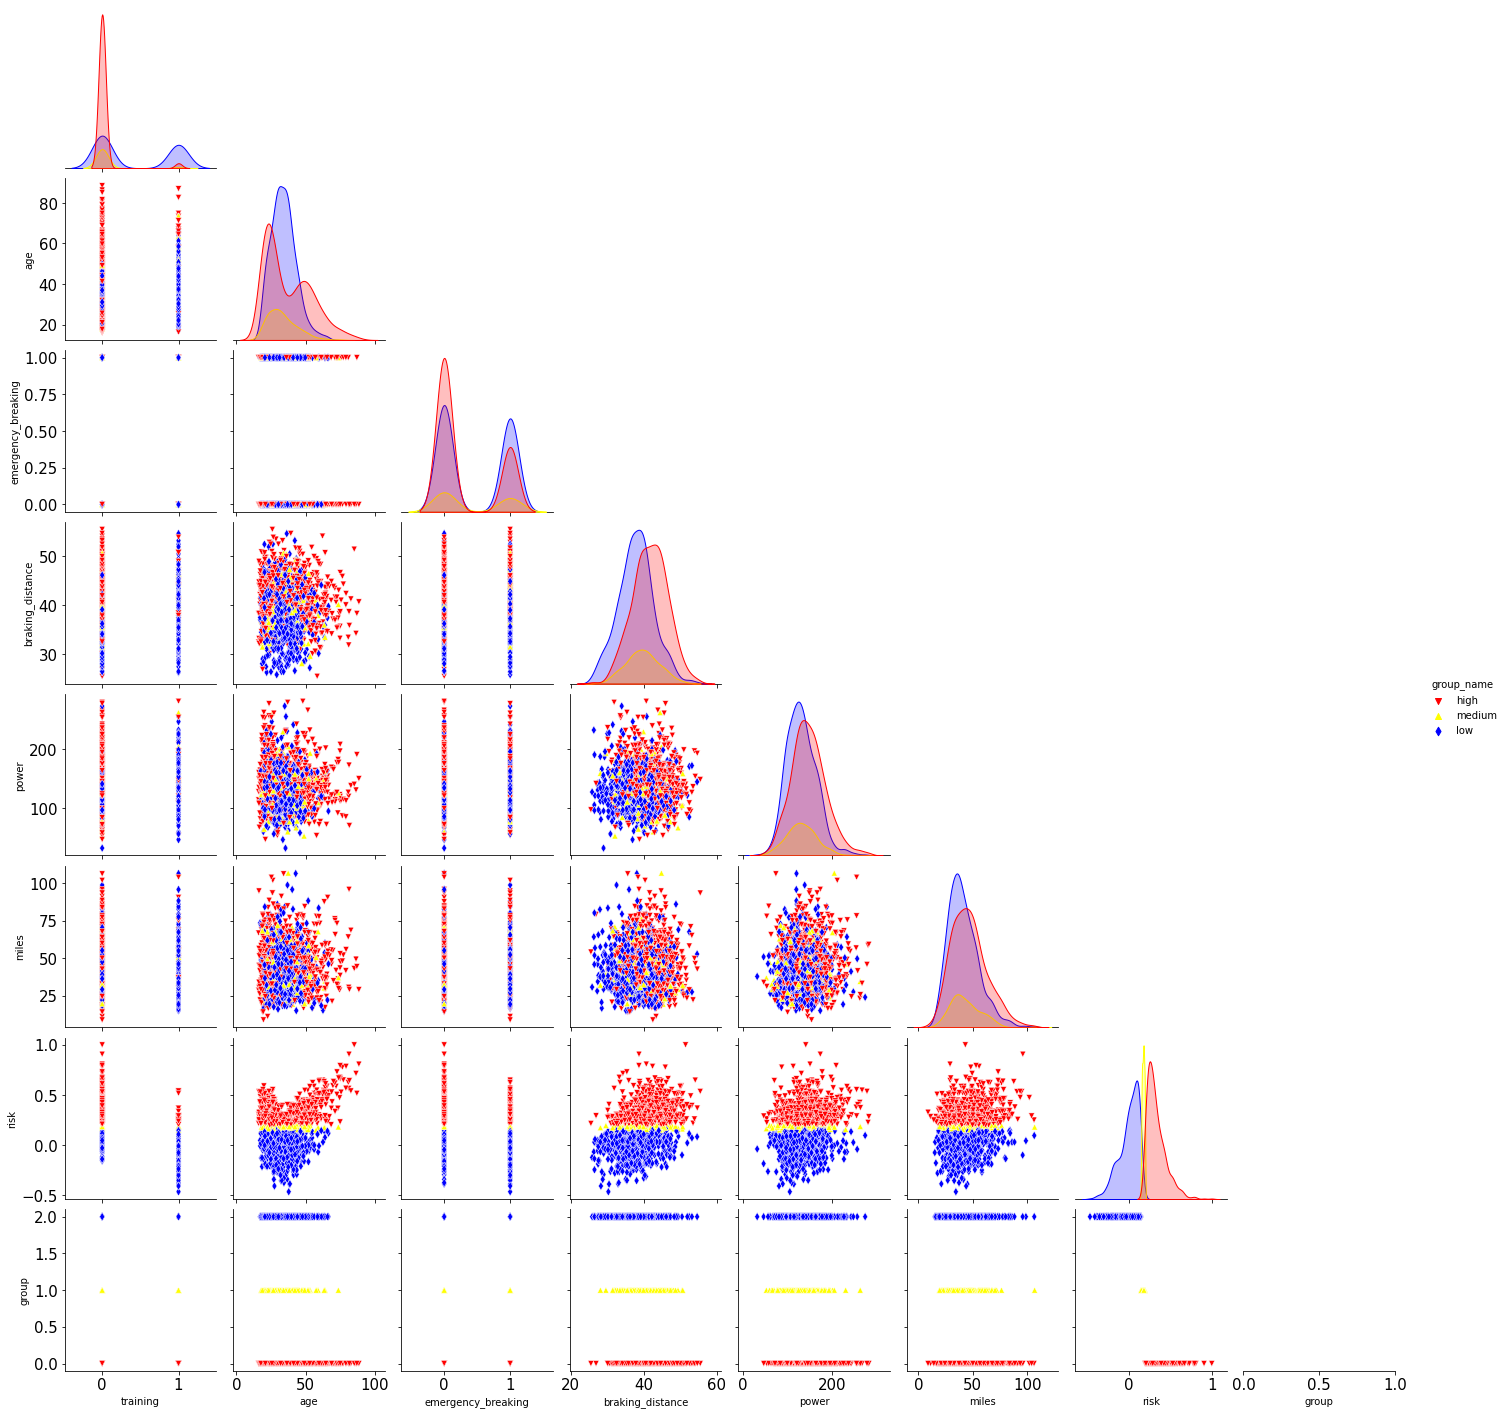

In [98]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# sns.pairplot(preprocessed_data, hue='group',  kind="kde";
 
sns.pairplot(preprocessed_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers);


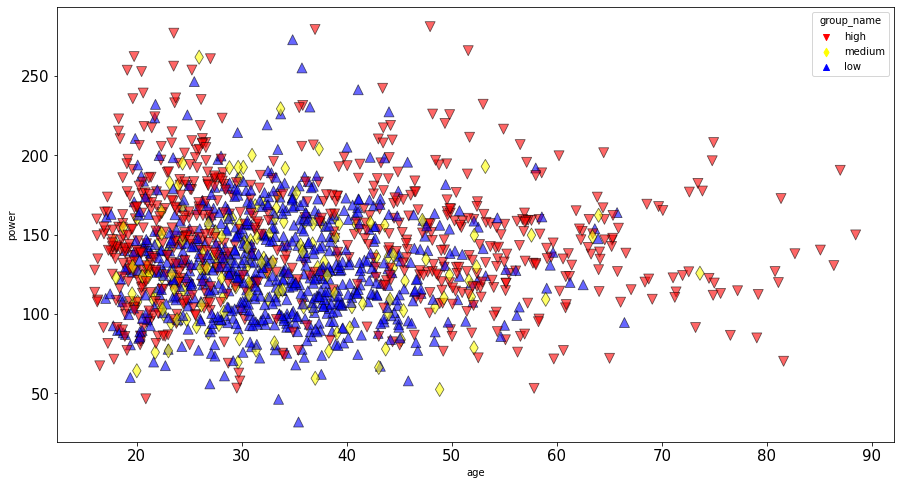

In [99]:
sns.scatterplot(preprocessed_data['age'], 
                preprocessed_data['power'], 
                hue=preprocessed_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=preprocessed_data['group_name'],
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [100]:
file_name = './model-based-1.csv'
preprocessed_data.to_csv(file_name, index=False, sep=';')

In [101]:
!ls -l

total 2720
-rw-r--r-- 1 olli olli  141895 Jul 22 16:03 generate-causal.ipynb
-rw-r--r-- 1 olli olli 2101079 Jul 22 13:52 generate.ipynb
-rw-r--r-- 1 olli olli   54500 May  9 12:33 insurance-customers-risk-1500-shift.csv
-rw-r--r-- 1 olli olli   54435 May  9 12:33 insurance-customers-risk-1500-test.csv
-rw-r--r-- 1 olli olli   54421 Jul 22 13:21 insurance-customers-risk-1500.csv
-rw-r--r-- 1 olli olli  156270 Jul 22 16:03 model-based-1.csv
-rw-r--r-- 1 olli olli  177561 Jul 22 13:27 stats-basics.ipynb
-rw-r--r-- 1 olli olli   28306 Jul 21 16:31 stats-causal.ipynb


In [102]:
customers = pd.read_csv(file_name, sep=';')
customers.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000
mean,0.207333,35.243806,0.384667,39.728535,137.524885,43.766704,0.166736,1.000
std,0.405532,13.193059,0.486679,5.108156,36.527189,15.274232,0.193054,0.949
min,0.000000,16.000000,0.000000,25.502431,31.956980,8.911590,-0.466122,0.000
25%,0.000000,24.971581,0.000000,36.261921,112.369662,32.597446,0.042936,0.000
50%,0.000000,32.511926,0.000000,39.697162,134.053456,41.697948,0.174691,1.000
75%,0.000000,43.043168,1.000000,43.284010,160.117914,52.330167,0.285114,2.000
max,1.000000,88.456666,1.000000,55.491497,281.197004,106.746630,1.000000,2.000


# Story: Assistant systems get more and more important, bringing down weight on driver ability and bringen up breaking systems over time 
* influence on driver ability can not be measured in input
* but inputs like age and assistant system

In [103]:
def generate_risk_data(driver_weight = 4.0, 
                       emergency_breaking_fraction = 0.40,
                       age_drift = 0,
                       n_samples=1_500, 
                       seed=42,
#                        apply_norm=True,
                       apply_norm=False,
                       low_risk_threshold = 1.0,
                       high_risk_threshold = 3.0,
                      low_risk_quantile=.3333,
                      high_risk_quantile=.6666):
    risk_model = StructuralCausalModel({
        "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    #     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
        "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100) \
            + np.random.normal(age_drift, scale=0.1, size=n_samples),
        "driver_ability": \
            lambda training, age, n_samples: 
                np.random.normal(loc=training - \
                                 # all deviation from good age is negative
                                 # using unskwed mean makes this a bit more balanaced
                                 abs(age - age_skewed_mean) / age_std, \
                                 scale=0.1),
        "emergency_breaking": lambda n_samples: np.random.binomial(1, p=emergency_breaking_fraction, size=n_samples), 
        "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
        "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
        "car_safety": \
            lambda emergency_breaking, braking_distance, power, n_samples: \
                np.random.normal(loc=emergency_breaking - \
                                 # having a breaking distance below average is negative, so we have to subtract
                                 (braking_distance - braking_distance_mean) / braking_distance_std - \
                                 # all deviation from good amount of power is negative
                                 abs(power - power_mean) / power_std, \
                                 scale=0.1),
        "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
        "risk": \
            lambda driver_ability, car_safety, miles, n_samples:
                    # negative score is high risk
                    # driver is overall more important than car
                 - np.random.normal(loc=\
                                 driver_ability * driver_weight\
                                 + car_safety
                                 # all deviation from good miles is negative
                                 - abs(miles - miles_mean) / miles_std, \
                                 scale=0.1)})
    np.random.seed(seed)
    data = risk_model.sample(n_samples=n_samples)
    
    preprocessed_data = data[features]
    # preprocessed_data = data.copy()
    if apply_norm:
        preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
    preprocessed_data['group_name'] = 'medium'
    preprocessed_data['group'] = YELLOW
    
    if low_risk_threshold is None:
        low_risk_threshold = preprocessed_data['risk'].quantile(low_risk_quantile)
        high_risk_threshold = preprocessed_data['risk'].quantile(high_risk_quantile)

    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])
    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])
    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])
    
    return preprocessed_data


In [104]:
generated_data = generate_risk_data()
generated_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,35.240226,0.370000,40.047327,134.393736,44.012633,2.263072,0.896667
std,0.405532,13.191571,0.482965,5.292310,33.410677,15.954862,2.613310,0.826909
min,0.000000,16.019190,0.000000,20.816722,45.272791,11.367135,-6.991965,0.000000
25%,0.000000,24.948022,0.000000,36.440032,110.333073,32.366821,0.712746,0.000000
50%,0.000000,32.462481,0.000000,39.922413,132.423028,41.403469,2.369354,1.000000
75%,0.000000,43.078459,1.000000,43.675832,155.296864,53.146008,3.937852,2.000000
max,1.000000,88.425701,1.000000,57.645276,257.983238,109.315794,12.307638,2.000000


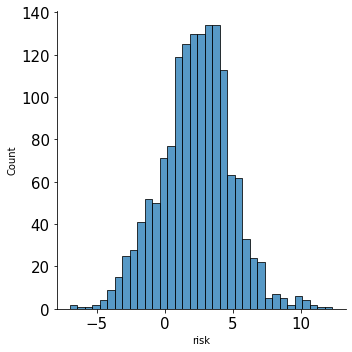

In [105]:
sns.displot(generated_data["risk"]);

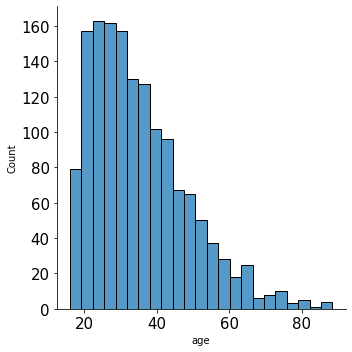

In [106]:
sns.displot(generated_data["age"]);

In [107]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([598, 443, 459]))

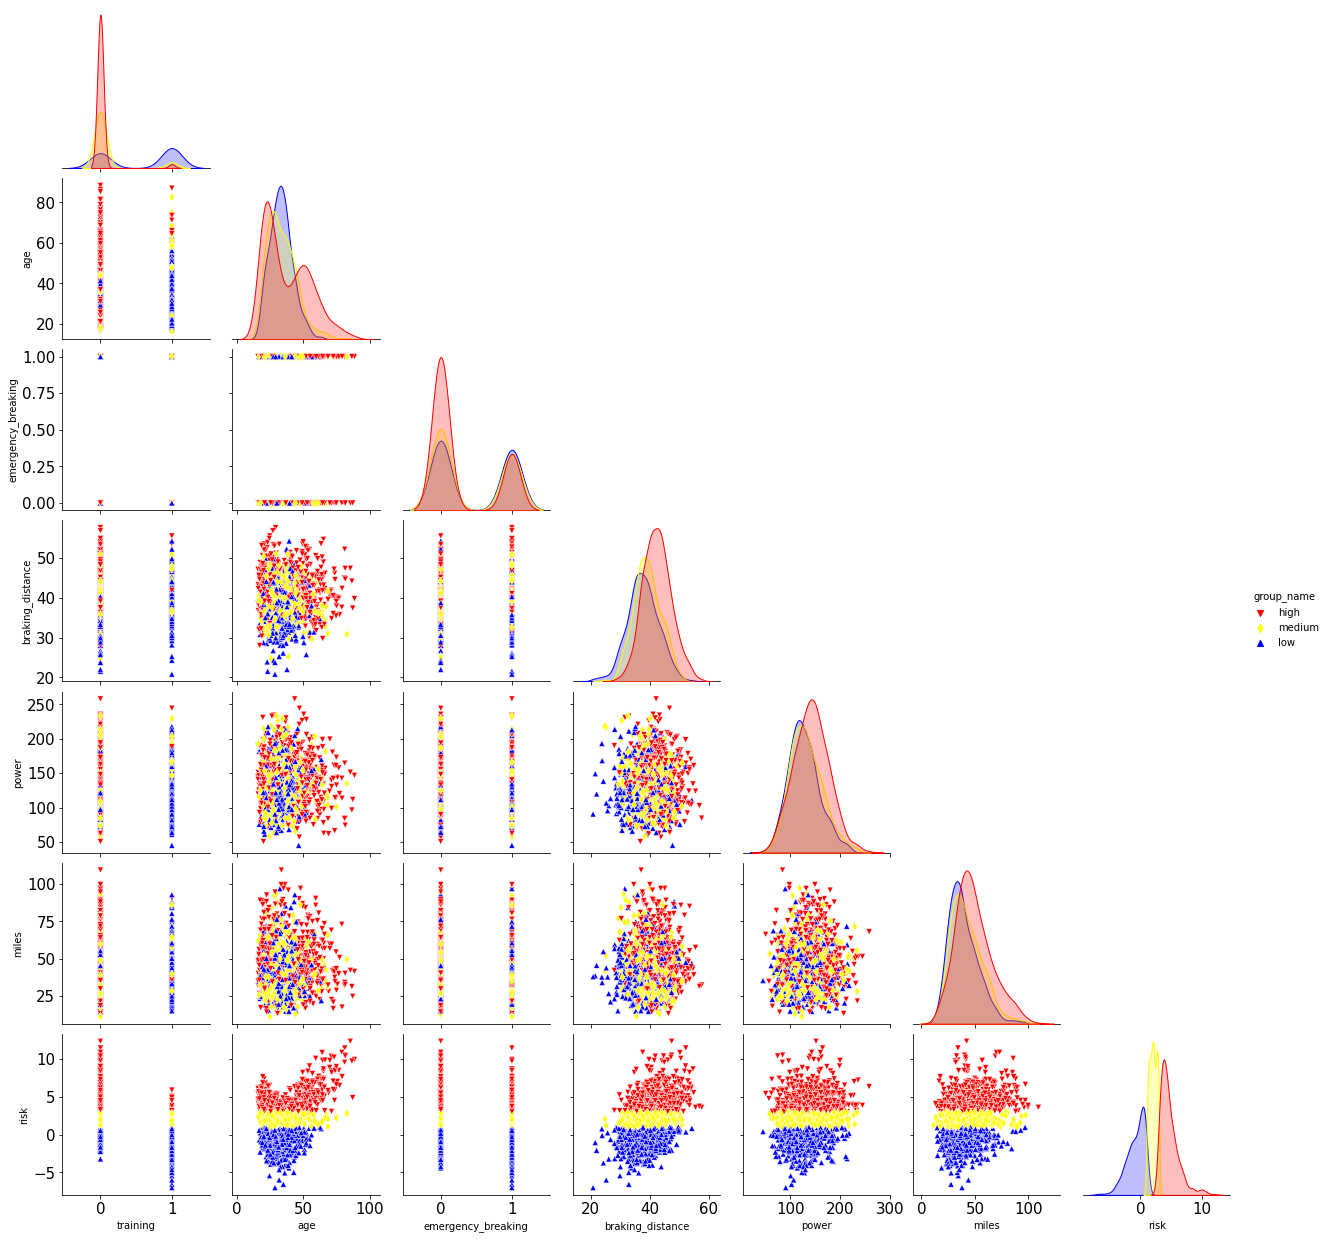

In [108]:
sns.pairplot(generated_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers,
             vars=features);

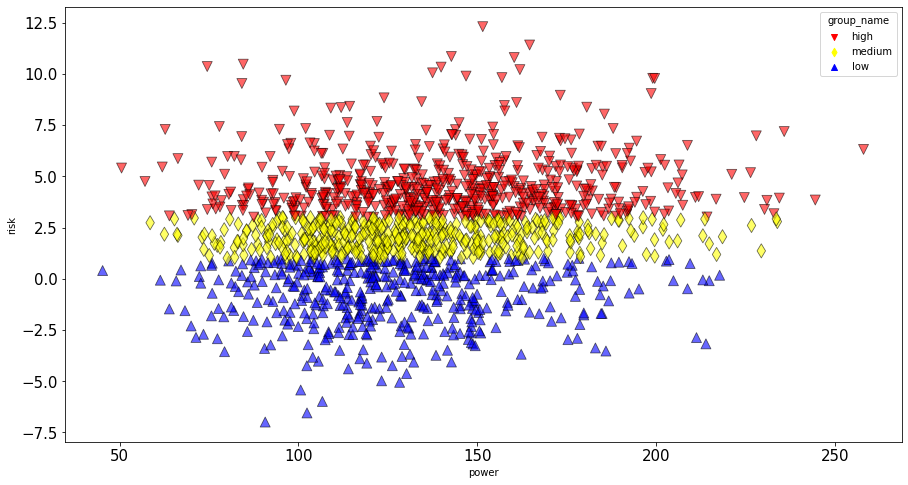

In [109]:
sns.scatterplot(generated_data['power'], 
                generated_data['risk'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

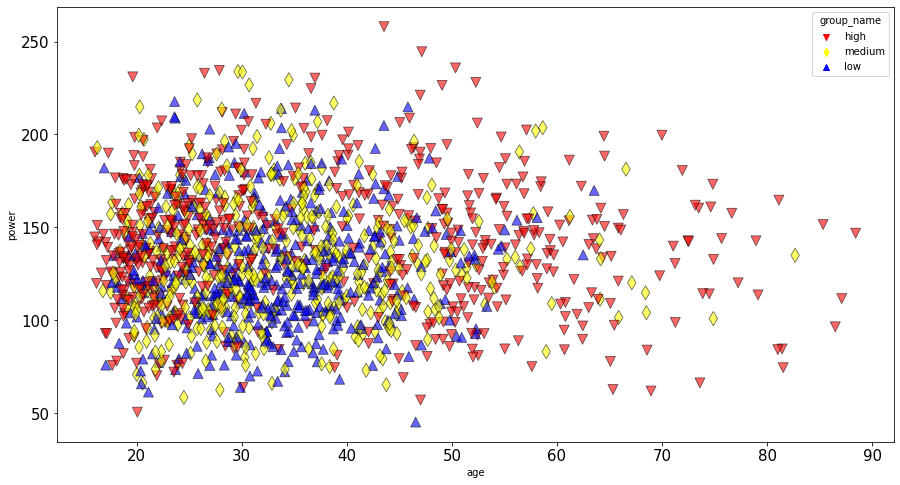

In [110]:
sns.scatterplot(generated_data['age'], 
                generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [111]:
gen_1 = generated_data

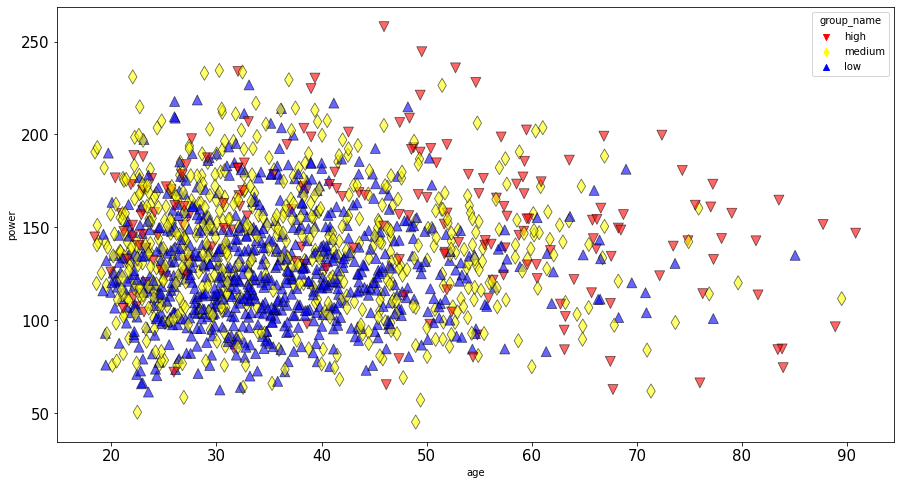

In [112]:
iteration = 24

generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                    age_drift = iteration * 0.1,
                                    emergency_breaking_fraction = 0.40 + iteration * 0.02)
sns.scatterplot(generated_data['age'], 
                generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [113]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([181, 716, 603]))

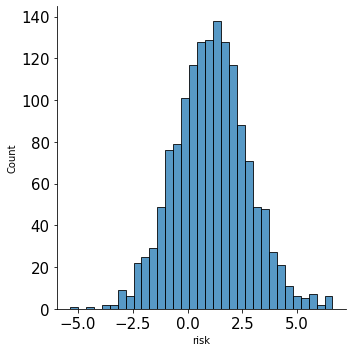

In [114]:
sns.displot(generated_data["risk"]);

In [115]:
generated_data.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.207333,37.640226,0.890667,40.047327,134.393736,44.012633,1.085830,1.356667
std,0.405532,13.191571,0.312161,5.292310,33.410677,15.954862,1.674250,0.686369
min,0.000000,18.419190,0.000000,20.816722,45.272791,11.367135,-5.371777,0.000000
25%,0.000000,27.348022,1.000000,36.440032,110.333073,32.366821,-0.017934,1.000000
50%,0.000000,34.862481,1.000000,39.922413,132.423028,41.403469,1.091746,1.000000
75%,0.000000,45.478459,1.000000,43.675832,155.296864,53.146008,2.119230,2.000000
max,1.000000,90.825701,1.000000,57.645276,257.983238,109.315794,6.610328,2.000000


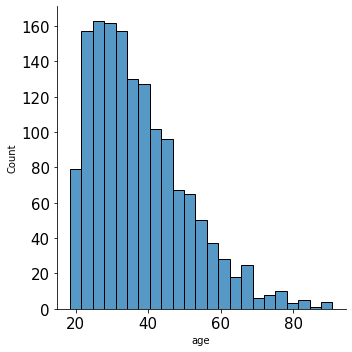

In [116]:
sns.displot(generated_data["age"]);

In [117]:
generated_data["age"].describe()

count    1500.000000
mean       37.640226
std        13.191571
min        18.419190
25%        27.348022
50%        34.862481
75%        45.478459
max        90.825701
Name: age, dtype: float64

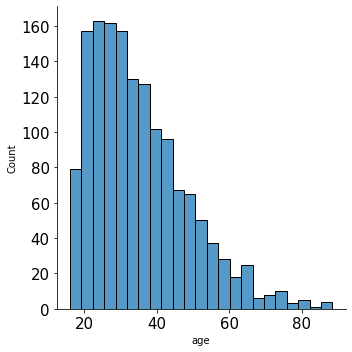

In [118]:
sns.displot(gen_1["age"]);

In [119]:
gen_1["age"].describe()

count    1500.000000
mean       35.240226
std        13.191571
min        16.019190
25%        24.948022
50%        32.462481
75%        43.078459
max        88.425701
Name: age, dtype: float64

In [120]:
import evidently

In [121]:
import evidently.analyzers

In [122]:
evidently.analyzers?

In [123]:
from evidently.analyzers.stattests.jensenshannon import jensenshannon_stat_test
from evidently.analyzers.stattests.kl_div import kl_div_stat_test
from evidently.analyzers.stattests.ks_stattest import ks_stat_test
from evidently.analyzers.stattests.psi import psi_stat_test
from evidently.analyzers.stattests.wasserstein_distance_norm import wasserstein_stat_test

In [124]:
# !pip install evidently

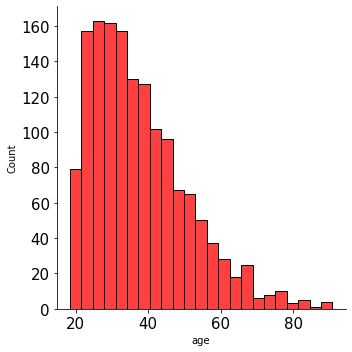

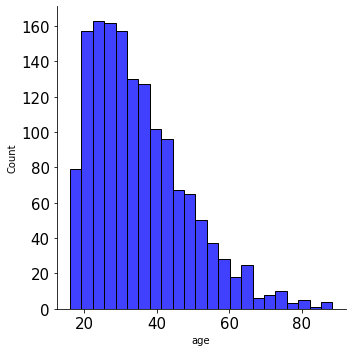

In [125]:
sns.displot(generated_data["age"], color='red');
sns.displot(gen_1["age"], color='blue');

In [126]:
ks_stat_test?

In [127]:
ks_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=1.2503686115967146e-05, drifted=True, actual_threshold=0.05)

In [134]:
# ks and wasserstein drift shortly after 10

In [135]:
iteration = 13

generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                    age_drift = iteration * 0.1,
                                    seed=iteration,
                                    emergency_breaking_fraction = 0.40 + iteration * 0.02)
wasserstein_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.1191385291393408, drifted=True, actual_threshold=0.1)

In [145]:
iteration = 11

generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                    age_drift = iteration * 0.1,
                                    seed=iteration,
                                    emergency_breaking_fraction = 0.40 + iteration * 0.02)
wasserstein_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

ks_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)


StatTestResult(drift_score=0.0037657665795975317, drifted=True, actual_threshold=0.05)